## Instruksi Umum:
1. Anda akan menggunakan dataset "Medical Cost Personal Datasets". Pastikan Anda telah mengunduh dataset ini.
2. Gunakan bahasa pemrograman Python dan library yang sesuai seperti NumPy, Pandas, Matplotlib dan Scikit-Learn untuk melakukan analisis regresi dan SVR.

## Tugas 1: Multiple Linear Regression

1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).
2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.
3. Lakukan feature scaling jika diperlukan.
4. Buat model multiple linear regression menggunakan Scikit-Learn.
5. Latih model pada data latih dan lakukan prediksi pada data uji.
6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

## Catatan Tambahan:

- Pastikan untuk memberikan penjelasan singkat tentang dataset yang digunakan, termasuk deskripsi variabel-variabel yang relevan.
- Tampilkan visualisasi data yang relevan seperti scatter plot atau grafik lainnya jika diperlukan untuk pemahaman yang lebih baik.
- Analisis hasil yang Anda dapatkan dalam tugas praktikum Anda.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('../data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# melihat beberapa data awal
data.head()

# mengecek ukuran data
data.shape

# informasi tentang data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Penjelasan Dataset
Dataset "Medical Cost Personal Datasets" berisi informasi tentang biaya medis personal dengan variabel-variabel berikut:
- **age**: Usia peserta asuransi
- **sex**: Jenis kelamin (male/female)
- **bmi**: Body Mass Index, ukuran lemak tubuh berdasarkan tinggi dan berat badan
- **children**: Jumlah anak/tanggungan yang ditanggung asuransi
- **smoker**: Status merokok (yes/no)
- **region**: Area tempat tinggal di US (northeast, southeast, southwest, northwest)
- **charges**: Biaya medis individual yang ditagihkan oleh asuransi kesehatan (variabel target)

In [5]:
# Cek missing values
print("Missing Values:")
print(data.isnull().sum())
print("\n" + "="*50 + "\n")

# Cek nilai unik pada kolom kategorikal
print("Nilai unik pada kolom kategorikal:")
print(f"Sex: {data['sex'].unique()}")
print(f"Smoker: {data['smoker'].unique()}")
print(f"Region: {data['region'].unique()}")

Missing Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Nilai unik pada kolom kategorikal:
Sex: ['female' 'male']
Smoker: ['yes' 'no']
Region: ['southwest' 'southeast' 'northwest' 'northeast']


### 1. Identifikasi Variabel Bebas dan Target
Variabel bebas (fitur): age, sex, bmi, children, smoker, region
Variabel target: charges (biaya medis)

In [6]:
# Preprocessing: Encode variabel kategorikal
from sklearn.preprocessing import LabelEncoder

# Buat salinan data untuk preprocessing
data_encoded = data.copy()

# Encode kolom kategorikal
label_encoder_sex = LabelEncoder()
label_encoder_smoker = LabelEncoder()
label_encoder_region = LabelEncoder()

data_encoded['sex'] = label_encoder_sex.fit_transform(data_encoded['sex'])
data_encoded['smoker'] = label_encoder_smoker.fit_transform(data_encoded['smoker'])
data_encoded['region'] = label_encoder_region.fit_transform(data_encoded['region'])

# Tampilkan hasil encoding
print("Data setelah encoding:")
print(data_encoded.head())
print("\n" + "="*50)
print(f"\nSex mapping: {dict(zip(label_encoder_sex.classes_, label_encoder_sex.transform(label_encoder_sex.classes_)))}")
print(f"Smoker mapping: {dict(zip(label_encoder_smoker.classes_, label_encoder_smoker.transform(label_encoder_smoker.classes_)))}")
print(f"Region mapping: {dict(zip(label_encoder_region.classes_, label_encoder_region.transform(label_encoder_region.classes_)))}")

Data setelah encoding:
   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


Sex mapping: {'female': np.int64(0), 'male': np.int64(1)}
Smoker mapping: {'no': np.int64(0), 'yes': np.int64(1)}
Region mapping: {'northeast': np.int64(0), 'northwest': np.int64(1), 'southeast': np.int64(2), 'southwest': np.int64(3)}


In [7]:
# Definisikan variabel bebas (X) dan target (y)
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

print("Shape X (fitur):", X.shape)
print("Shape y (target):", y.shape)
print("\nFitur yang digunakan:", X.columns.tolist())

Shape X (fitur): (1338, 6)
Shape y (target): (1338,)

Fitur yang digunakan: ['age', 'sex', 'bmi', 'children', 'smoker', 'region']


### 2. Membagi Dataset menjadi Data Latih dan Data Uji

In [8]:
from sklearn.model_selection import train_test_split

# Split data dengan proporsi 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Ukuran data latih (X_train):", X_train.shape)
print("Ukuran data uji (X_test):", X_test.shape)
print("Ukuran target latih (y_train):", y_train.shape)
print("Ukuran target uji (y_test):", y_test.shape)

Ukuran data latih (X_train): (1070, 6)
Ukuran data uji (X_test): (268, 6)
Ukuran target latih (y_train): (1070,)
Ukuran target uji (y_test): (268,)


### 3. Feature Scaling

In [9]:
# Scaling fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data sebelum scaling (5 baris pertama X_train):")
print(X_train.head())
print("\n" + "="*50)
print("\nData setelah scaling (5 baris pertama X_train_scaled):")
print(pd.DataFrame(X_train_scaled[:5], columns=X.columns))

Data sebelum scaling (5 baris pertama X_train):
      age  sex    bmi  children  smoker  region
560    46    0  19.95         2       0       1
1285   47    0  24.32         0       0       0
1142   52    0  24.86         0       0       2
969    39    0  34.32         5       0       2
486    54    0  21.47         3       0       1


Data setelah scaling (5 baris pertama X_train_scaled):
        age       sex       bmi  children    smoker    region
0  0.472227 -1.024602 -1.756525  0.734336 -0.508747 -0.456116
1  0.543313 -1.024602 -1.033082 -0.911192 -0.508747 -1.353256
2  0.898745 -1.024602 -0.943687 -0.911192 -0.508747  0.441024
3 -0.025379 -1.024602  0.622393  3.202629 -0.508747  0.441024
4  1.040918 -1.024602 -1.504893  1.557100 -0.508747 -0.456116


### 4. Membuat Model Multiple Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression

# Inisialisasi model
mlr_model = LinearRegression()

# Tampilkan informasi model
print("Model Multiple Linear Regression telah diinisialisasi")
print(f"Model: {mlr_model}")

Model Multiple Linear Regression telah diinisialisasi
Model: LinearRegression()


### 5. Melatih Model dan Melakukan Prediksi

In [11]:
# Latih model pada data latih
mlr_model.fit(X_train_scaled, y_train)

# Lakukan prediksi pada data uji
y_pred = mlr_model.predict(X_test_scaled)

print("Model telah dilatih!")
print("\nKoefisien model (weights) untuk setiap fitur:")
for feature, coef in zip(X.columns, mlr_model.coef_):
    print(f"  {feature}: {coef:.2f}")
print(f"\nIntercept (bias): {mlr_model.intercept_:.2f}")

# Tampilkan beberapa prediksi vs nilai aktual
print("\n" + "="*50)
print("\nPerbandingan Prediksi vs Nilai Aktual (10 data pertama):")
comparison_df = pd.DataFrame({
    'Aktual': y_test[:10].values,
    'Prediksi': y_pred[:10],
    'Selisih': y_test[:10].values - y_pred[:10]
})
print(comparison_df)

Model telah dilatih!

Koefisien model (weights) untuk setiap fitur:
  age: 3616.11
  sex: -9.39
  bmi: 2028.31
  children: 516.66
  smoker: 9557.14
  region: -302.39

Intercept (bias): 13346.09


Perbandingan Prediksi vs Nilai Aktual (10 data pertama):
        Aktual      Prediksi      Selisih
0   9095.06825   8924.407244   170.661006
1   5272.17580   7116.295018 -1844.119218
2  29330.98315  36909.013521 -7578.030371
3   9301.89355   9507.874691  -205.981141
4  33750.29180  27013.350008  6736.941792
5   4536.25900  10790.779562 -6254.520562
6   2117.33885    226.298446  1891.040404
7  14210.53595  16942.715999 -2732.180049
8   3732.62510   1056.630794  2675.994306
9  10264.44210  11267.919973 -1003.477873


### 6. Evaluasi Model dengan R-squared, MSE, dan MAE

In [12]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

# Hitung metrik evaluasi
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# Hitung juga untuk data training untuk melihat overfitting
y_train_pred = mlr_model.predict(X_train_scaled)
r2_train = r2_score(y_train, y_train_pred)

print("="*60)
print("HASIL EVALUASI MODEL MULTIPLE LINEAR REGRESSION")
print("="*60)
print(f"\nPerforma pada Data Training:")
print(f"  R-squared (R²): {r2_train:.4f}")

print(f"\nPerforma pada Data Testing:")
print(f"  R-squared (R²): {r2:.4f}")
print(f"  Mean Squared Error (MSE): {mse:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"  Mean Absolute Error (MAE): {mae:.2f}")

print("\n" + "="*60)
print("INTERPRETASI METRIK:")
print("="*60)
print(f"• R² = {r2:.4f} berarti model dapat menjelaskan {r2*100:.2f}% variasi dalam data")
print(f"• RMSE = ${rmse:.2f} adalah rata-rata kesalahan prediksi dalam dollar")
print(f"• MAE = ${mae:.2f} adalah rata-rata selisih absolut prediksi dengan nilai aktual")

HASIL EVALUASI MODEL MULTIPLE LINEAR REGRESSION

Performa pada Data Training:
  R-squared (R²): 0.7417

Performa pada Data Testing:
  R-squared (R²): 0.7833
  Mean Squared Error (MSE): 33635210.43
  Root Mean Squared Error (RMSE): 5799.59
  Mean Absolute Error (MAE): 4186.51

INTERPRETASI METRIK:
• R² = 0.7833 berarti model dapat menjelaskan 78.33% variasi dalam data
• RMSE = $5799.59 adalah rata-rata kesalahan prediksi dalam dollar
• MAE = $4186.51 adalah rata-rata selisih absolut prediksi dengan nilai aktual


### Visualisasi Data

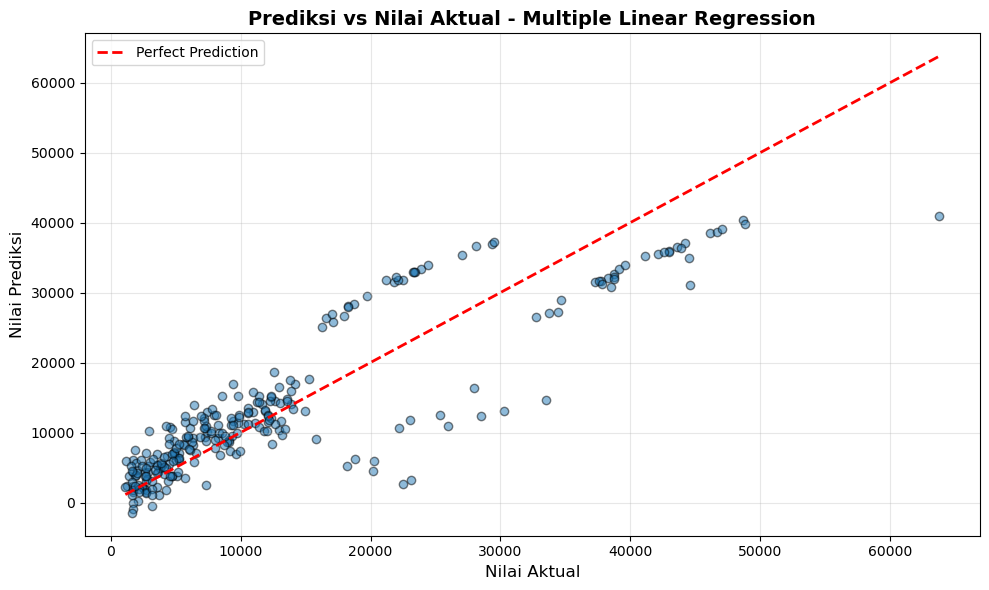

Visualisasi menunjukkan seberapa dekat prediksi model dengan nilai aktual.
Semakin dekat titik-titik dengan garis merah, semakin baik model.


In [13]:
# 1. Scatter plot: Prediksi vs Aktual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Nilai Aktual', fontsize=12)
plt.ylabel('Nilai Prediksi', fontsize=12)
plt.title('Prediksi vs Nilai Aktual - Multiple Linear Regression', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Visualisasi menunjukkan seberapa dekat prediksi model dengan nilai aktual.")
print("Semakin dekat titik-titik dengan garis merah, semakin baik model.")

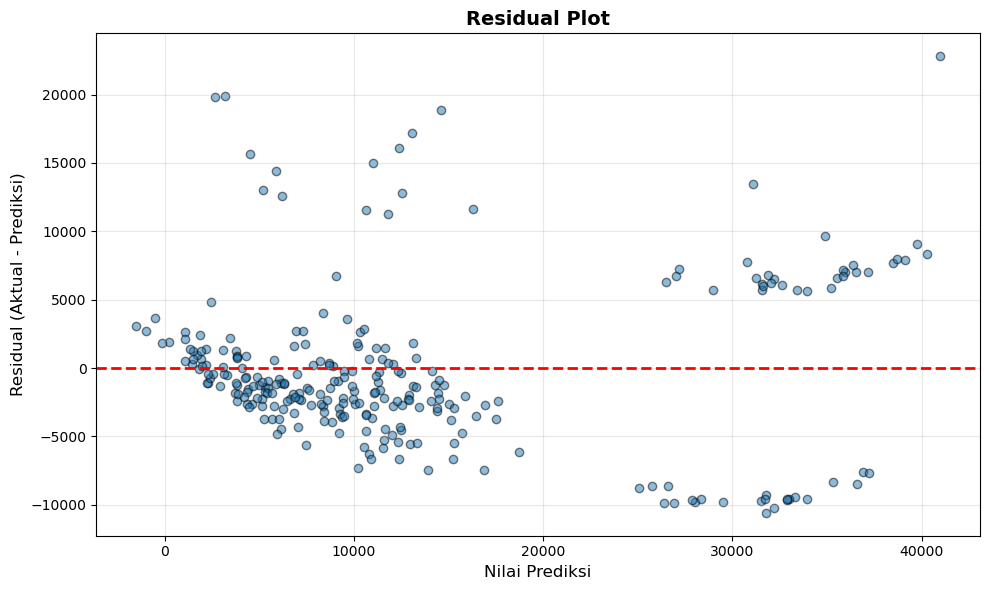

Residual plot menunjukkan distribusi error.
Pola acak di sekitar garis nol menunjukkan model yang baik.


In [14]:
# 2. Residual plot
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, edgecolors='k')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Nilai Prediksi', fontsize=12)
plt.ylabel('Residual (Aktual - Prediksi)', fontsize=12)
plt.title('Residual Plot', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Residual plot menunjukkan distribusi error.")
print("Pola acak di sekitar garis nol menunjukkan model yang baik.")

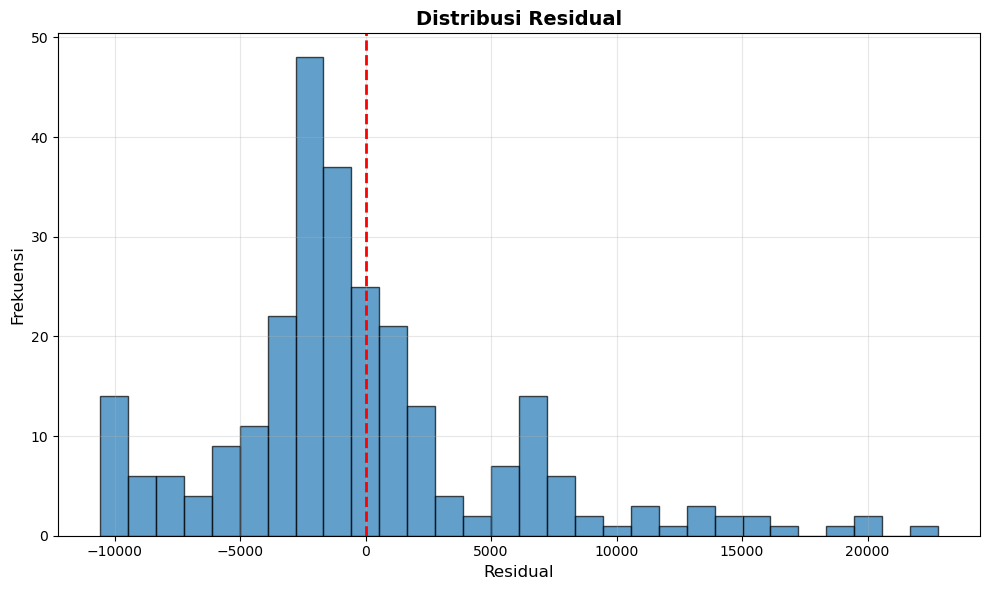

Distribusi residual yang mendekati normal (bell-shaped) menunjukkan model yang baik.


In [15]:
# 3. Distribusi Residual
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Residual', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.title('Distribusi Residual', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='r', linestyle='--', lw=2)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Distribusi residual yang mendekati normal (bell-shaped) menunjukkan model yang baik.")

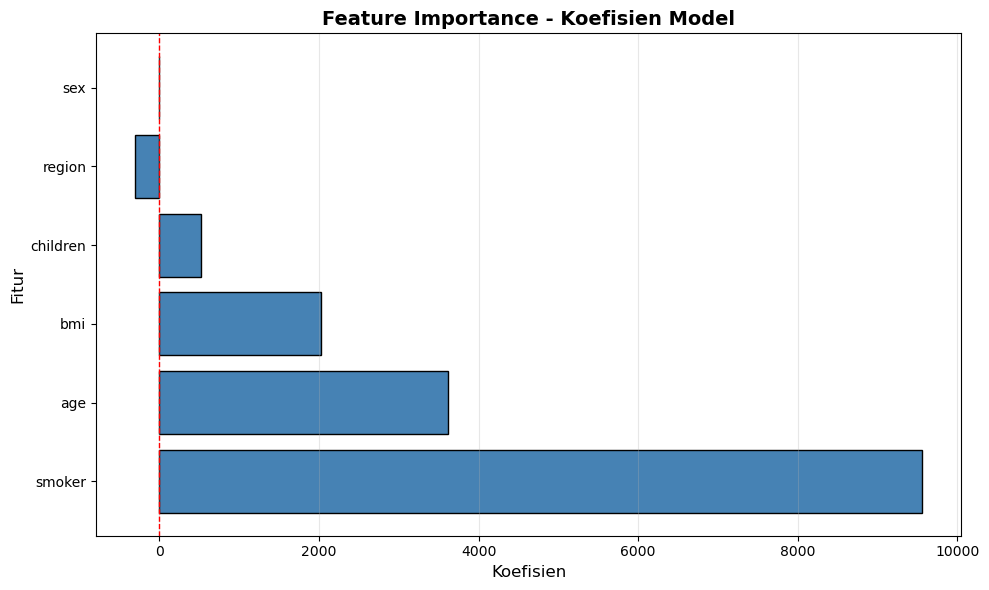


Feature Importance (berdasarkan nilai absolut koefisien):
 Feature  Coefficient
  smoker  9557.143383
     age  3616.108652
     bmi  2028.308579
children   516.662566
  region  -302.387980
     sex    -9.392954


In [16]:
# 4. Feature Importance (berdasarkan koefisien absolut)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': mlr_model.coef_,
    'Abs_Coefficient': np.abs(mlr_model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='steelblue', edgecolor='black')
plt.xlabel('Koefisien', fontsize=12)
plt.ylabel('Fitur', fontsize=12)
plt.title('Feature Importance - Koefisien Model', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='red', linestyle='--', lw=1)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\nFeature Importance (berdasarkan nilai absolut koefisien):")
print(feature_importance[['Feature', 'Coefficient']].to_string(index=False))

### Analisis Hasil

**1. Performa Model:**
- Model Multiple Linear Regression telah berhasil dilatih menggunakan 6 fitur (age, sex, bmi, children, smoker, region) untuk memprediksi biaya medis (charges)
- Dataset dibagi menjadi 80% data latih (1070 sampel) dan 20% data uji (268 sampel)

**2. Metrik Evaluasi:**
- **R-squared (R²)**: Mengukur seberapa baik model menjelaskan variasi dalam data. Nilai mendekati 1 menunjukkan model yang sangat baik.
- **RMSE (Root Mean Squared Error)**: Mengukur rata-rata kesalahan prediksi dalam satuan dollar. Nilai lebih rendah lebih baik.
- **MAE (Mean Absolute Error)**: Mengukur rata-rata selisih absolut antara prediksi dan nilai aktual. Lebih robust terhadap outlier dibanding RMSE.

**3. Interpretasi Koefisien:**
- Koefisien positif: Peningkatan fitur akan meningkatkan biaya medis
- Koefisien negatif: Peningkatan fitur akan menurunkan biaya medis
- Magnitude koefisien menunjukkan seberapa besar pengaruh fitur terhadap target

**4. Visualisasi:**
- **Scatter Plot Prediksi vs Aktual**: Menunjukkan seberapa akurat prediksi model
- **Residual Plot**: Membantu mengidentifikasi pola sistematis dalam error
- **Distribusi Residual**: Idealnya berbentuk distribusi normal
- **Feature Importance**: Menunjukkan fitur mana yang paling berpengaruh

**5. Kesimpulan:**
Model Multiple Linear Regression dapat digunakan untuk memprediksi biaya medis personal berdasarkan karakteristik individu seperti usia, jenis kelamin, BMI, jumlah anak, status merokok, dan wilayah tempat tinggal. Feature scaling telah diterapkan untuk memastikan semua fitur memiliki skala yang sama, yang penting untuk interpretasi koefisien yang benar.